In [4]:

# import module list is independent on respective file.
import yfinance as yf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt



from datetime import datetime as dt
from datetime import date as date
from datetime import timedelta
from dateutil.relativedelta import relativedelta

from tqdm.notebook import tqdm
from scipy.stats import mstats
import japanize_matplotlib



In [8]:

def folding_price_data(df, index2):
       


    DATA = pd.DataFrame({})


    for i in range(0,len(df), index2):

        try:
            temp = df.iloc[i:index2+i,:]
        except:
            temp = df.iloc[i:,:]
        M, m = max(temp["High"]), min(temp["Low"])
        open_p, close_p = temp['Open'].values[0], temp['Close'].values[-1]
        tp = pd.DataFrame({'Open':[open_p], 'High':[M], 'Low':[m], 'Close':[close_p]}, index=[temp.index.to_list()[0]])
        DATA = pd.concat([DATA, tp], axis=0)
        


    return DATA 


        

In [23]:
# 月時価格データおよび予測

predict = pd.read_csv("./prediction/" + 'IYR' + "3mo.csv", index_col=0, parse_dates=True)
predict

,predict
2007-05-01,0.0
2007-08-01,1.0
2007-11-01,0.0
2008-02-01,0.0
2008-05-01,1.0
...,...
2022-08-01,0.0
2022-11-01,1.0
2023-02-01,0.0
2023-05-01,1.0


In [24]:
ticker = 'IYR'
price = yf.download(ticker, start='2011-08-01', end='2023-08-31', interval='1mo')

price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-08-01,61.099998,61.099998,49.049999,57.220001,37.559284,418286500
2011-09-01,57.060001,57.380001,50.430000,50.570000,33.194210,231594400
2011-10-01,50.180000,58.180000,46.700001,57.240002,37.977825,243037900
2011-11-01,55.720001,57.529999,51.230000,55.139999,36.584503,172846900
2011-12-01,54.990002,57.660000,53.509998,56.810001,37.692516,116678700
...,...,...,...,...,...,...
2023-04-01,84.800003,86.050003,82.500000,85.680000,84.318527,140376800
2023-05-01,85.360001,85.889999,79.940002,82.230003,80.923355,124955000
2023-06-01,82.089996,87.040001,81.360001,86.540001,85.164871,129892000


In [6]:
'''
data2 = yf.download(ticker, start='2011-01-01', end='2023-06-30', interval='1d')
switch = 0



def get_nth_week(day):
    return (day - 1) // 7 + 1

def get_nth_dow(year, month, day):
    return get_nth_week(day), calendar.weekday(year, month, day)


def get_nth_dow_datetime(year, month, day):
    return get_nth_week(day), date(year, month, day).weekday()

def get_date_of_nth_dow(year, month, nth, dow):
    day = get_day_of_nth_dow(year, month, nth, dow)
    return dt.date(year, month, day) if day else None

# 12日(休日の場合は直後の平日)に決済、決済後の平日に新規購入        

for i, j in data2.iterrows():
    

    if i.month % 3 != 2:
        data2.loc[i, 'Trade'] =  0
        continue

    
    if switch == 1:
        switch += 1
        data2.loc[i, 'Trade'] =  2
        continue
    
    
    
    
    
    if (switch == 0) & (i.day>= 12):
        data2.loc[i, 'Trade'] =  1
        switch += 1

    elif i.day in range(1, 11):
        data2.loc[i, 'Trade'] =  0
        
        switch = 0
    
    else:
        data2.loc[i, 'Trade'] =  0
        pass
    
    
        
    
data2 = data2.fillna({"Trade": float(0)})
data2['year'], data2['month'] = data2.index.year, data2.index.month
data2.head(100)
'''

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Trade,year,month
Date,,,,,,,,,
2011-01-03,56.290001,56.930000,56.250000,56.830002,36.647141,8221200,0.0,2011,1
2011-01-04,57.000000,57.080002,55.560001,55.820000,35.995823,11275100,0.0,2011,1
2011-01-05,55.639999,56.169998,55.599998,56.049999,36.144135,9167100,0.0,2011,1
2011-01-06,56.139999,56.230000,55.619999,55.750000,35.950687,6797500,0.0,2011,1
2011-01-07,55.900002,56.099998,55.230000,55.730000,35.937798,10495700,0.0,2011,1
...,...,...,...,...,...,...,...,...,...
2011-05-19,61.619999,61.980000,61.250000,61.660000,40.108246,5112300,0.0,2011,5
2011-05-20,61.450001,61.660000,60.980000,61.029999,39.698444,5737100,0.0,2011,5
2011-05-23,60.389999,60.689999,60.290001,60.389999,39.282131,10880900,0.0,2011,5


In [50]:
data2 = pd.read_csv('data/IYRprice_perday.csv', index_col=0, parse_dates=True)

In [25]:
fold_index = 3
price_and_predict = pd.concat([folding_price_data(price.loc["2010-02-01":"2023-08-01"], fold_index), predict.loc[:"2023-06-01",:]],axis=1)
price_and_predict

,Open,High,Low,Close,predict
2007-05-01,NaN,NaN,NaN,NaN,0.0
2007-08-01,NaN,NaN,NaN,NaN,1.0
2007-11-01,NaN,NaN,NaN,NaN,0.0
2008-02-01,NaN,NaN,NaN,NaN,0.0
2008-05-01,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...
2022-08-01,99.669998,103.360001,75.660004,83.989998,0.0
2022-11-01,84.870003,92.669998,80.010002,92.589996,1.0
2023-02-01,92.230003,96.019997,78.110001,85.680000,0.0
2023-05-01,85.360001,90.339996,79.940002,88.050003,1.0


In [71]:
# graphization
def graph(df, save, file_name, simple_profit=False):
    if not simple_profit:
        
        print("利回り中心です。各y値は、総資産/初期資金です。")
        temp = df["interest"].values

        initial = df["Asset"][0] 
        lis = np.cumsum(temp) + initial

        profit_month =np.array(lis)  / initial
        
        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(profit_month).cummax().values
        
        total = profit_month
        
        # ドローダウンの計算
        dd = 1 - profit_month / max_assets
    else:
        print("単利計算です。各y値は、その時点までの各利率の累積です。")
        temp = df["Return"].values

        
        
        profit_month = np.array(temp)

        # 単利運用での資産額の計算
        total = 1 + np.cumsum(profit_month)

        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(total).cummax().values

        # ドローダウンの計算
        dd = max_assets - total
    
    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')

    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax2 = ax1.twinx()
    indexes = [dt.strftime(df.index[i], '%Y-%m-%d') if i % 4 == 2 else '' for i in range(len(df))]

    ax1.set_xticks(list(range(len(df))))
    ax1.set_xticklabels(indexes,rotation=45)
    
    

    ax1.set_ylabel('cummulativeReturn')
    ax1.plot(total, label='Total')
    ax1.plot(max_assets, label='max Total')
    ax1.legend()
    

    ax2.set_ylabel('Drawdown(％)')
    ax2.bar(np.arange(len(dd)), dd*100, alpha=0.5, color='pink', label='ドローダウン(％)')
    ax2.legend(loc='upper right')
    if save:
        fig.savefig(file_name+".png")

In [90]:




# plはprofit and loss です.

def order_pl(data, losscut, profitlevel, losscut2, profitlevel2, predict):
    open_price = data.query('Trade==2')['Open'].values[0]
    open_price = float(open_price)
    skip_num = np.where(data['Trade'].values==2)[0][0]
    
    switch = 0
    # ↓not used
    return_value = 0
    data = data.iloc[skip_num:, :]
    try:
        exit_idxs = np.where(data['Trade'].values==1)[1]
    except:
        exit_idxs = np.where(data['Trade'].values==1)[0]
        
    if len(exit_idxs) > 0:
        # データに手仕舞い日以降のデータが含まれていたら削除
        data = data.iloc[:exit_idxs[-1]+1]
    string = "None"
    for i, temp in data.iterrows():

        high_to_open = temp["High"] - open_price
        open_to_low = open_price - temp["Low"]
        if predict == 0: 
            
            # sell order 

            perspective_maxloss = high_to_open 
            perspective_maxprofit = open_to_low
            
            losscut_rate = losscut2
            profit_rate = profitlevel2
            
            director = -1    
        else:           
            
            # buy order
            
            perspective_maxloss = open_to_low
            perspective_maxprofit = high_to_open
            director = 1
            
            losscut_rate = losscut
            profit_rate = profitlevel
            pass
        
        

        profit_secure = perspective_maxprofit >= open_price * profit_rate
        loss_cut = perspective_maxloss >= open_price * losscut_rate
        if (not profit_secure) and (not loss_cut):
            # 利確・損切に到達していないとき
            continue
        elif profit_secure and loss_cut:
            
            
            assert False, "TODO: 日中でロスカットと利確ラインに到達した場合の処理を書く"
        elif profit_secure:
            profit = open_price * profit_rate
            message = 'crossed'
            print("check : Profit Line is crossed.")
            return profit, message, open_price, i
        else: # loss_cut
            profit = -open_price * losscut_rate
            message = 'losscut.'
            print("check : Losscut.")
            return profit, message, open_price, i

    try:
        data.query('Trade==1')['Close'].values[-1]
    except:
        close_price = data['Close'].tail(1).values
        return_value =  close_price - open_price
        return_value *= director
    else:
        return_value = data.query('Trade==1')['Close'].values[-1] - open_price
        return_value *= director


    

    
    return (return_value, string, open_price, i)


def judge_message(message):
    if message == 'crossed':
        profitline, loss_cut = "crossed", "safe"
    elif message == 'losscut.':
        profitline, loss_cut = "not crossed", "Losscut."
    elif message != 'anomally':
        profitline, loss_cut = 'not crossed', 'safe'
    else:
        profitline, loss_cut = 'anomally', 'anomally'
    return (profitline, loss_cut)
    
def judge_count(message):
    if message == 'crossed':
        profitline, loss_cut = 1, 0
    elif message == 'losscut.':
        profitline, loss_cut = 0, 1
    else:
        profitline, loss_cut = 0, 0
    return (profitline, loss_cut)

# This code(function) yields to totalreturn_per_year_list and dataframe of whole trades.
# If variable option is not incerted,  option is void, or empty.(空白)
# data2 is price data per day.

def calc(data, losscut_rate, profitlevel, reverse, leverage,losscut2, profitlevel2, data2=data2):
    
    profit_count = 0 
    losscut_count = 0
    
    
    predicts = data["predict"].values
    # "reverse" were the opposite, then What score...?
    if reverse:
        predicts = [int(not num) for num in predicts] 
        print("(入力前の)シグナルが0なら買います。")
    else:
        # reverse_ind = 1
        print("(入力前の)シグナルが0なら売ります。")
    
    
    
    
    box = []
    totalreturn = 0
    Asset = 0
    
    loss_cut_sgn = "safe"
    profit_count = 0
    losscut_count = 0
    dic = {}
    df = pd.DataFrame()
    initiate_asset = data["Open"][0]
    
    
    for i,ind in enumerate(data.index) :       
        predict = predicts[i]
        
        year = int(ind.year)
        month = int(ind.month)
        
        # Example startが2011.7.12のとき、2011.7.1 ～ 2011.8.28までのデータを入手
        init = date(year, month, 1)
        
        # data2は日時データで一部をqueryで抜粋する。
        # ex.start : 2011.7のとき、intervalが1か月ならば、7月13日あたり(休日等考慮)に取引して、2011.8.12あたりに手じまいする。
        # となると, 2月が28日までなので、1か月先の8月28日まで入手する必要がある。
        
        end = date(year, month, 28) + relativedelta(months=6)
        
        # arg : data, losscut, profitline, losscut2, profitline2, predict
        try:
            interest, message, open_price, Day = order_pl(data=data2.query("Date >=@init & Date <=@end"),
                                                      losscut=losscut_rate, 
                                                      profitlevel=profitlevel,
                                                      losscut2=losscut2, 
                                                      profitlevel2=profitlevel2, 
                                                      predict=predict)
        except:
            print(ind)
            continue
        
        
        
        profitline, loss_cut_sgn = judge_message(message)
        profit_count += judge_count(message)[0]
        losscut_count +=  judge_count(message)[1] 
        
        ensuring_time = (Day - ind).days
        

        interest *= leverage
        totalreturn += interest
        Return = interest / open_price
        dic = {"signal":predict, "Return":Return, "totalreturn":totalreturn,"profitline":profitline,"loss_cut":loss_cut_sgn,"interest":interest, "open_price":open_price, 'settlement day':Day, 'ensuring_time':ensuring_time}
        temp = pd.DataFrame(dic, index=[ind])
        df = pd.concat([df,temp],axis=0)
        
        

            
    print(f"loss_cut: {losscut_count}", f"profit_count: {profit_count}")
    print(f"totalreturn: {totalreturn}", f"initiate_asset:{initiate_asset}")
    

    
    return df
FirstTake = True     

In [81]:
FirstTake

False

In [91]:

Date, enddate = '2014-08-01', "2023-06-01"    
data =  price_and_predict.loc[Date:enddate, :]
if FirstTake:
    loss_cut2, profitline2 = 0.1, 0.1
    FirstTake = False
lis = []
max_yield, tp1, sharp_ratio1, i1, j1 = 0, 0, 0, 0, 0

for k in tqdm(range(1375, 1376, 1)):
    loss_cut = k * 0.01*0.01
    for j in range(927, 1014, 15):       
        profitline = j * 0.01*0.01

        df = calc(
            data=data,
            losscut_rate=loss_cut, 
            profitlevel=profitline, 
            reverse=False,
            leverage=1, # 第４因数は、Falseの方がデフォです。
            losscut2=loss_cut2, 
            profitlevel2=profitline2, 
            data2=data2)  
        sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)

        #print(sharp_ratio*np.sqrt(4))
        lis.append(sharp_ratio*2)
        if sharp_ratio >= sharp_ratio1:

            last_losscut = loss_cut
            last_profitlevel = profitline



            sharp_ratio1 = sharp_ratio

for l in (range(1140, 1141, 1)):
    loss_cut2 = l*0.01*0.01
    for m in range(1015, 1431, 15):       
        profitline2 = m*0.01*0.01

        # data, losscut_rate, profitlevel, reverse, leverage,losscut2, profitline2, data2=data2

        df = calc(
            data=data,
            losscut_rate=last_losscut, 
            profitlevel=last_profitlevel, 
            reverse=False,
            leverage=1, # 第４因数は、Falseの方がデフォです。
            losscut2=loss_cut2, 
            profitlevel2=profitline2, 
            data2=data2)  
        sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)

        print(sharp_ratio*np.sqrt(4))
        lis.append(sharp_ratio*2)
        if sharp_ratio >= sharp_ratio1:


            sell_last_losscut = loss_cut2
            sell_last_profitlevel = profitline2


            sharp_ratio1 = sharp_ratio




print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(4)}")  

  0%|          | 0/1 [00:00<?, ?it/s]

(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 6 profit_count: 20
totalreturn: [127.76026768] initiate_asset:71.5999984741211
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit L

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 19
totalreturn: [137.23214114] initiate_asset:71.5999984741211
1.1013227091623639
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 19
totalreturn: [138.31035614] initiate_as

check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 18
totalreturn: [144.49454416] initiate_asset:71.5999984741211
1.1213549657803796
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
ch

check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 16
totalreturn: [145.63344962] initiate_asset:71.5999984741211
1.1068574376798634
(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 16
totalreturn: [146.35220462] initiate_asset:71.5999984741211
1.108585787026338
sell_last_losscut : 0.114 sell_last_profitlevel : 0.1015 

In [93]:

print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(4)}")  


sell_last_losscut : 0.114 sell_last_profitlevel : 0.1015 last_losscut　：0.1375 last_profitlevel : 0.09269999999999999  sharpratio : 1.2868748636773757


(入力前の)シグナルが0なら売ります。
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
loss_cut: 4 profit_count: 21
totalreturn: [151.17236243] initiate_asset:71.5999984741211
sharp ratio : 1.2868748636773757
単利計算です。各y値は、その時点までの各利率の累積です。
最大ドローダウン: 26.000 %


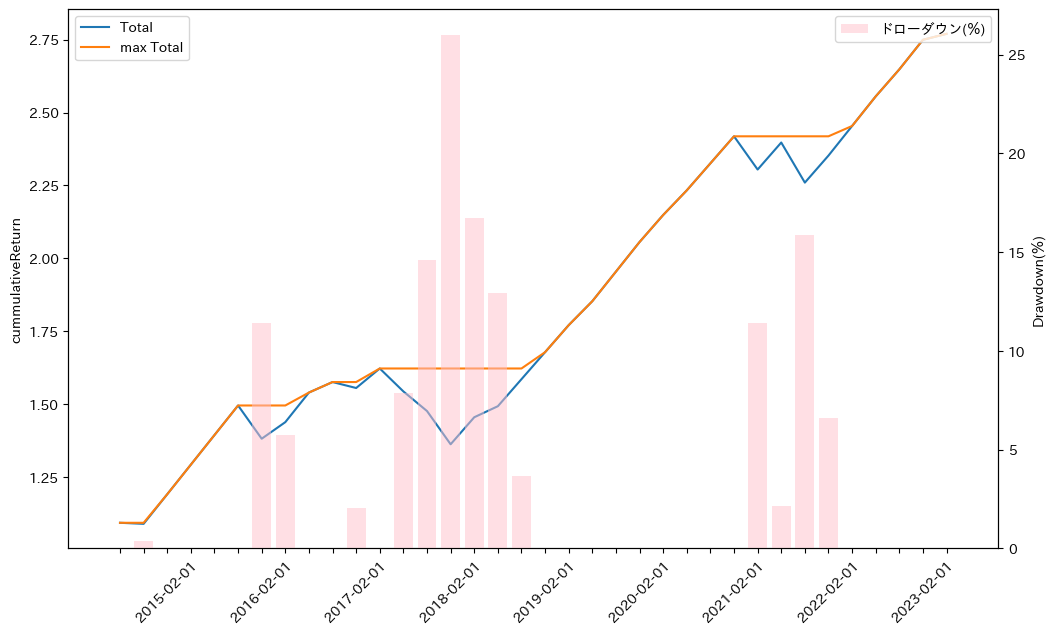

In [94]:
data =  price_and_predict["2014-08-01":"2023-06-01"]


df = calc(data=data,
        losscut_rate=last_losscut, 
        profitlevel=last_profitlevel, 
        reverse=False,
        leverage=1, # 第４因数は、Falseの方がデフォです。
        losscut2=sell_last_losscut, 
        profitlevel2=sell_last_profitlevel, 
        data2=data2)  
sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)
print(f"sharp ratio : {sharp_ratio*np.sqrt(4)}")
graph(df=df,
      save=False, 
      file_name="./graph_image/"+ticker+"graph", 
      simple_profit=True
     )

In [27]:
#df.to_csv('data/10start.csv')

In [11]:
1=2 # Run all でここまで実行する。

SyntaxError: cannot assign to literal (Temp/ipykernel_8184/224602424.py, line 1)

In [95]:
df

,signal,Return,totalreturn,profitline,loss_cut,interest,open_price,settlement day,ensuring_time
2014-08-01,1.0,0.092700,6.716115,crossed,safe,6.716115,72.449997,2015-01-07,159
2014-11-01,0.0,-0.003590,6.446110,not crossed,safe,-0.270004,75.199997,2015-05-12,192
2015-02-01,0.0,0.101500,14.646296,crossed,safe,8.200185,80.790001,2015-06-25,144
2015-05-01,0.0,0.101500,22.360296,crossed,safe,7.714000,76.000000,2015-09-04,126
2015-08-01,0.0,0.101500,30.007305,crossed,safe,7.647010,75.339996,2016-01-20,172
...,...,...,...,...,...,...,...,...,...
2022-05-01,0.0,0.101500,121.624215,crossed,safe,9.661785,95.190002,2022-09-23,145
2022-08-01,0.0,0.101500,132.031010,crossed,safe,10.406795,102.529999,2022-09-15,45
2022-11-01,1.0,0.092700,140.115376,crossed,safe,8.084367,87.209999,2023-02-02,93
2023-02-01,0.0,0.101500,149.452361,crossed,safe,9.336985,91.989998,2023-03-10,37


In [20]:
#df.to_csv('testdata/'+ticker+'dataframe.csv')

In [15]:
dfY = df
dfY['year'] = dfY.index.year
dfY['month'] = dfY.index.month
table = {}
pd.set_option('display.max_rows', 20)
start = 2014
for year in range(start, 2023, 1):

    dfZ = dfY.query('year==@year')
    Max_asset = dfZ[['open_price']].max()
    Sum_profit = dfZ['interest'].sum()
    Return = Sum_profit / Max_asset.values
    #table[str(year+1)+ '.3'] = Max_asset
    table[str(year+1)+ '.3'] = Return
pd.DataFrame.from_dict(table, orient='index')

,0
2015.3,0.085720
2016.3,0.130462
2017.3,0.050377
2018.3,-0.099843
2019.3,0.114269
2020.3,0.396753
2021.3,0.357805
2022.3,-0.070868
2023.3,0.443569


,0
初期資金,75.199997
全トレード数,16.0
勝率,68.75%
負率,31.25%
全トレード平均利益,3.987131
勝ちトレード平均利益,8.4193
負けトレード平均利益,-5.763641
プロフィットファクター,3.213673


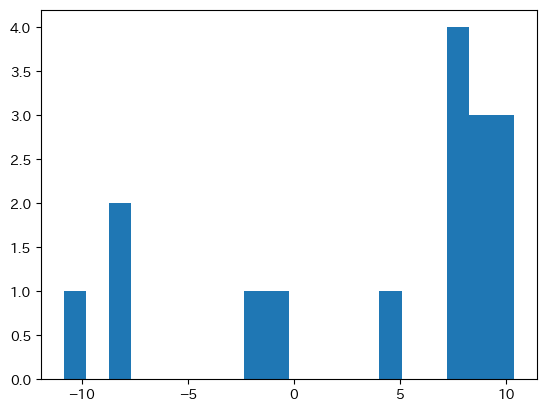

In [98]:
def Evaluation(df):
    Sel = pd.Series()
    Sel['初期資金'] = df['open_price'][0]
    
    Sel["全トレード数"] = df.shape[0]
    #print((10**2) * df.query('interest >= 0').count() / df.shape[0])
    Sel["勝率"] = "{:.2f}%".format((10**2) * df.query('interest >= 0').shape[0] / df.shape[0])
    Sel["負率"] = "{:.2f}%".format((10**2)* df.query('interest < 0').shape[0] / df.shape[0])
    Sel["全トレード平均利益"] = df['interest'].mean()
    Sel["勝ちトレード平均利益"] =  df.query('interest >= 0')['interest'].mean()
    Sel["負けトレード平均利益"] =  df.query('interest < 0')['interest'].mean()
    
    Sel["プロフィットファクター"] = df.query('interest >= 0')['interest'].sum() / -df.query('interest < 0')['interest'].sum()
    
    display(pd.DataFrame(Sel))
    fig, ax = plt.subplots()
    ax.hist(df['interest'], bins=20, label='interest')
Evaluation(df.query('signal==0'))

C:\Users\admin\AppData\Local\Temp\ipykernel_3780\2345961192.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predict']= [1 for i in range(len(df))]


(入力前の)シグナルが0なら売ります。
loss_cut: 0 profit_count: 0
totalreturn: [19.39002991] initiate_asset:71.5999984741211
単利計算です。各y値は、その時点までの各利率の累積です。
最大ドローダウン: 26.000 %


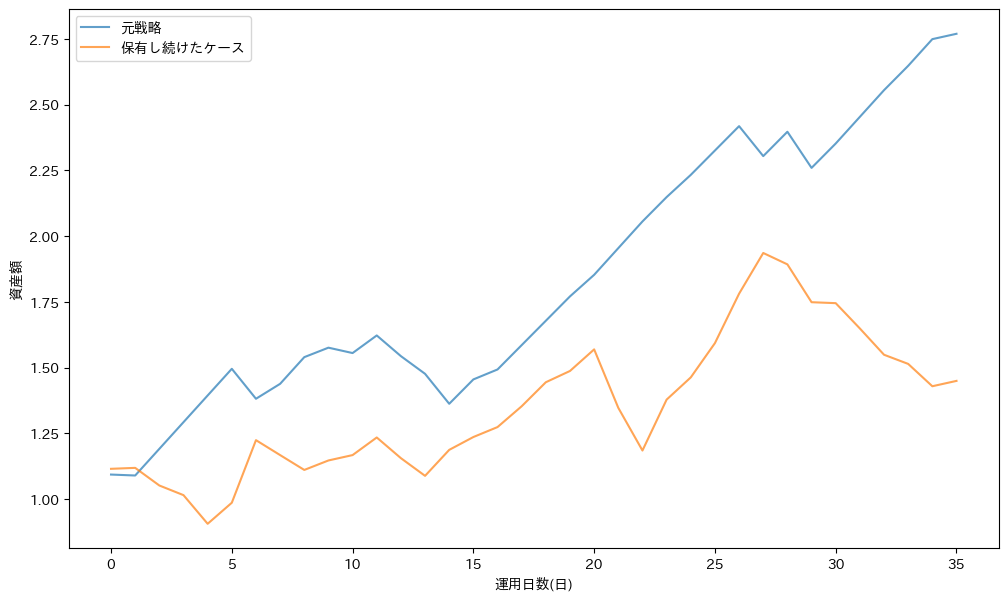

In [38]:

data['predict']= [1 for i in range(len(df))]
c, df3 = calc(data, 1, 1, False,1,1, data2)
def graph3(df, save, file_name, raw_data=df3, simple_interest=False):
    if not simple_interest:
        
        print("利回り中心です。各y値は、総資産/初期資金です。")
        temp, temp2 = df["interest"].values, raw_data["interest"].values

        initial = df["open_price"][0] 
        lis = np.cumsum(temp) + initial
        lis2 = np.cumsum(temp2) + initial
        
        
        profit_month =np.array(lis)  / initial
        profit_month2 =np.array(lis2)  / initial

        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(profit_month).cummax().values
        
        total = profit_month
        total2 = profit_month2

        
        # ドローダウンの計算
        dd = 1 - profit_month / max_assets
    else:
        print("単利計算です。各y値は、その時点までの各利率の累積です。")
        temp, temp2 = df["Return"].values, raw_data["Return"].values

        

        profit_daily = temp
        profit_daily2 = temp2


        # 単利運用での資産額の計算(初日を1とする)
        total = 1 + np.cumsum(profit_daily) 
        total2 = 1 + np.cumsum(profit_daily2)

        
        # 日ごとのそれまでの最大資産の計算
        max_assets = pd.Series(total).cummax().values 

        # ドローダウンの計算
        dd = max_assets - total # 単利運用なので初期資金(1)に対する額で計算
    
    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')
    fig, ax1 = plt.subplots(figsize=(12, 7))

    ax1.set_xlabel('運用日数(日)')
    ax1.set_ylabel('資産額')
    
    ax1.plot(total, label='元戦略', alpha=0.7)
    ax1.plot(total2, label='保有し続けたケース', alpha=0.7)

    ax1.legend()
    
    if save:
        fig.savefig(file_name+".png")

graph3(df, True, './graph_image/USReit_3mo2', df3, True)